In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Numpy練習

## ndarrayの作成
numpyの多次元配列のようなもの

In [84]:
a = [[1, 2], [3, 4]]
a = np.array(a)
a

array([[1, 2],
       [3, 4]])

In [107]:
# 3行4列の成分が全て1の行列を作成
ones = np.ones([3, 4])
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## 行列計算

In [85]:
a * 2

array([[2, 4],
       [6, 8]])

In [86]:
a + 2

array([[3, 4],
       [5, 6]])

In [87]:
b = np.array([[2, 3], [-1, 2]])
# 足し算
a + b

array([[3, 5],
       [2, 6]])

In [88]:
# 引き算
a - b

array([[-1, -1],
       [ 4,  2]])

In [89]:
# 掛け算
a * b

array([[ 2,  6],
       [-3,  8]])

In [90]:
# 割り算
a / b

array([[ 0.5       ,  0.66666667],
       [-3.        ,  2.        ]])

## 内積・逆行列・転置行列

In [91]:
# 内積
a.dot(b)

array([[ 0,  7],
       [ 2, 17]])

In [92]:
# 逆行列
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [93]:
# 転置行列
a.T

array([[1, 3],
       [2, 4]])

# matplotlib練習

## 直線を引く

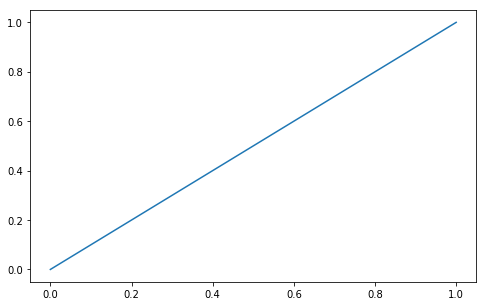

In [94]:
plt.figure(figsize=(8, 5)) # グラフの大きさを設定
# 第一引数: xが0から1に変化
# 第二引数: yが0から1に変化
plt.plot([0, 1], [0, 1])

## 関数を描画する

[-6, 6, -1.2, 1.2]

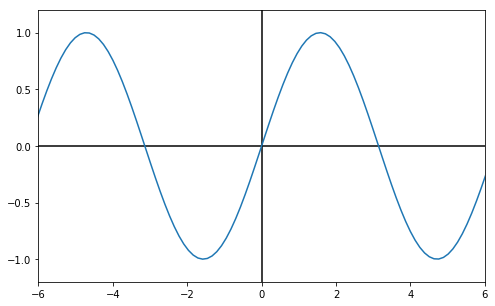

In [95]:
# y = sin(x)を描画する
x = np.linspace(-2*np.pi, 2*np.pi, 100) # -2πから2πまで１００個の点を取る
y = np.sin(x)

plt.figure(figsize=(8, 5))
plt.plot([0, 0], [-2, 2], color='black')
plt.plot([-6, 6], [0, 0], color='black')
plt.plot(x, y)
plt.axis([-6, 6, -1.2, 1.2]) # グラフの表示範囲の設定

## 練習: $y=x^2+3x-2$のグラフを描画する

# 線形回帰

線形回帰モデルの予測
\begin{equation}
\hat{y} =\theta_0 + \theta_1 x_1 + \cdot \cdot \cdot+ \theta_n x_n
\end{equation}

- $\hat{y} $ : 予測された値
- n : 特徴量数
- $x_i$ : i番目の特徴量
- $\theta_j$ j番目のモデルのパラメータ(バイアス項$\theta_0$特徴量の重み$\theta_1, \theta_2, \cdot \cdot \cdot ,\theta_n$を含む)

ベクトル式で表す
\begin{equation}
\hat{y} =h_\theta(x) = \theta^T \cdot x
\end{equation}

- $\theta$: モデルのパラメータベクトル(バイアスの項$\theta_0, \theta_1$から$\theta_n$項までの特徴量の重みを含む)
- $\theta^T$: $\theta$の転置
- $x$: インスタンスの特徴量ベクトル($x_0$から$x_n$までを含む　ただし$x_0$は1)
- $\theta^T \cdot x$:  $\theta^T$と$x$のドット積
- $h_\theta$: モデルパラメータ$\theta$を使った仮説関数

線形回帰のもっとも一般的な性能指標は`平均二乗誤差(Mean Square Error: MSE)`である

\begin{equation}
MSE(X, h(\theta)) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T \cdot x - y^{(i)})^2
\end{equation}

## 正規方程式(最小二乗法のベクトル版)
コスト関数を最小にする$\theta$を見つけるための閉形式解がある  
これを正規方程式と呼ぶ

\begin{equation}
\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y
\end{equation}

- $\hat{\theta}$: コスト関数を最小にする$\theta$
- y: $y^{(1)}$から$y^{(m)}$までのターゲット値を格納するベクトル

### 例題
https://mathtrain.jp/seikiequ  
(2, 3), (4, 7), (9, 11) というデータの組に対して正規方程式を適用してもっともらしい直線を引け。


求める直線の傾きを p，切片を q とおくと
\begin{equation}
\hat{\theta} = 
\begin{pmatrix}
  p \\
  q 
\end{pmatrix}
\end{equation}

\begin{equation}
X = 
\begin{pmatrix}
  2 & 1 \\
  4 & 1 \\
  9 & 1
\end{pmatrix}
, 
y = 
\begin{pmatrix}
  3  \\
  7 \\
  11
\end{pmatrix}
\end{equation}

※Xの`1`はバイアス項

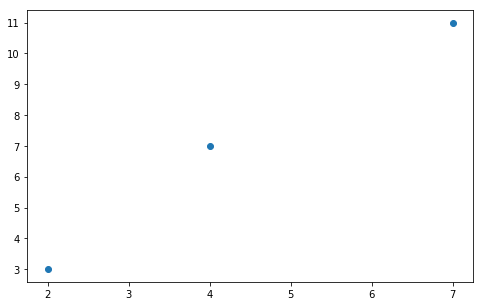

In [96]:
X_row = [2, 4, 7]
y_row = [3, 7, 11]
plt.figure(figsize=(8, 5))
plt.scatter(X_row, y_row)

In [97]:
X = np.array([[2, 1], [4, 1], [9, 1]])
y = np.array([[3], [7], [11]])

In [98]:
X

array([[2, 1],
       [4, 1],
       [9, 1]])

In [11]:
y

array([[ 3],
       [ 7],
       [11]])

## 問題1:  $\hat{\theta}$を計算する

- $x^t$は`X.T`で得られる
- 内積は`X.dot(y)`を用いる($X \cdot y$)
- 逆行列は`np.linalg.inv(a)`で得られる

## 乱数を発生させてやってみる

[0, 2, 0, 15]

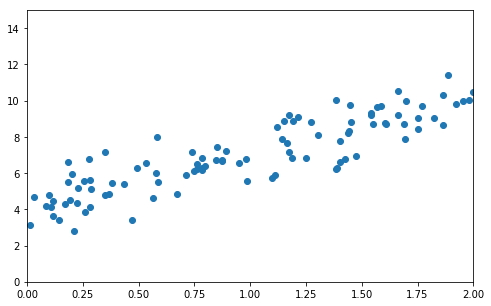

In [2]:
'''
y = 3x+4 + ノイズ
'''
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])

In [3]:
X_b = np.c_[ X, np.ones((100, 1))] # バイアス項1を結合している
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
best_theta

array([[2.9772784 ],
       [4.11852372]])

In [4]:
X_new = np.array([[0], [2]]) # xが0と2の時のyを予測する
X_new_b = np.c_[X_new, np.ones((2, 1))] # バイアス項1を結合している
y_predict = X_new_b.dot(best_theta)
y_predict

array([[ 4.11852372],
       [10.07308052]])

[0, 2, 0, 15]

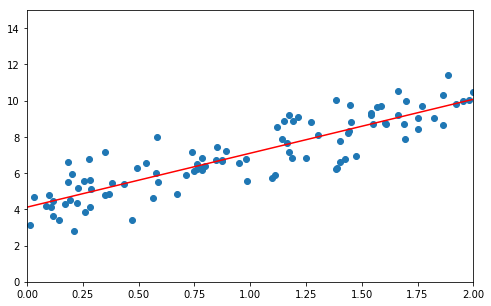

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])

## scikit-learnを使用して行う

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print('傾き: {}, 切片{}'.format(lin_reg.coef_, lin_reg.intercept_)) 

傾き: [[2.9772784]], 切片[4.11852372]


In [8]:
lin_reg.predict(X_new)

array([[ 4.11852372],
       [10.07308052]])

## 問題2: y = -2x+2 にノイズを乗せたデータセットを作成して傾きと切片を求める

# 勾配下降法
正規方程式の処理は大規模な訓練データでもメモリにおさまる限り効率よくできるが、予測インスタンスが２倍、特徴量が2倍になると処理にかかる時間も2倍になってしまう。

## バッチ勾配下降法
\begin{equation}
\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{T}\cdot x^{(i)} - y^{(i)})x_j^{(i)}
\end{equation}

この偏微分を個別に計算しなくても以下の式を使用すれば全てまとめて計算できる

\begin{equation}
\nabla_\theta MSE(\theta) =\left(
                                        \begin{array}{c}
                                          \frac{\partial}{\partial \theta_0}MSE(\theta) \\
                                          \frac{\partial}{\partial \theta_1}MSE(\theta)  \\
                                          \vdots \\
                                          \frac{\partial}{\partial \theta_n}MSE(\theta)
                                        \end{array}
                                     \right)
= \frac{2}{m} X^T \cdot (X \cdot \theta - y)
\end{equation}

勾配ベクトルを得たとき、全体として上むきなら、逆方向に下降する  
これは$\theta$から$\nabla_\theta MSE(\theta)$を引くということになる  
ここで学習率$\eta$を使用して勾配を降るステップの間隔を調整する

\begin{equation}
\theta^{(nextstep)} = \theta - \eta \nabla_\theta MSE(\theta)
\end{equation}

In [9]:
eta = 0.1
n_iterations = 1000
m = len(X)

X_b = np.c_[ X, np.ones((100, 1))]
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [10]:
theta

array([[2.9772784 ],
       [4.11852372]])

In [11]:
def plot_eta(eta, n_iterations = 1000):
    m = len(X_b)
    theta = np.random.randn(2, 1)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y)
    plt.title('$\eta$: {}'.format(eta))
    
    for iteration in range(n_iterations):
        if iteration < 10:
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
            theta = theta - eta * gradients
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, "r-")

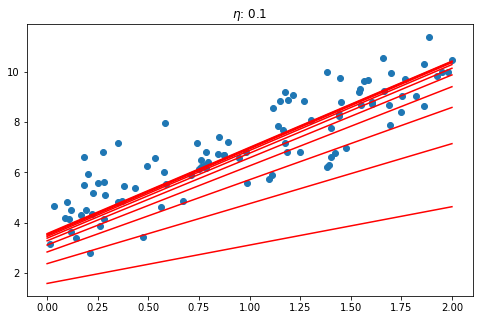

In [12]:
plot_eta(0.1)

etaの数値を変えてみて